In [1]:
%matplotlib inline 

from fnmatch import fnmatch
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pattern import web

import xml.etree.ElementTree as ET
# set some nicer defaults for matplotlib
from matplotlib import rcParams
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from lxml import html
from bs4 import BeautifulSoup


#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import urllib2


In [3]:
#Problem 1
def get_poll_xml(num):
    return requests.get('http://charts.realclearpolitics.com/charts/'+str(num)+'.xml').text 

In [4]:
get_poll_xml(1044)

u'<?xml version="1.0" encoding="UTF-8"?><chart><series><value xid=\'0\'>1/27/2009</value><value xid=\'1\'>1/28/2009</value><value xid=\'2\'>1/29/2009</value><value xid=\'3\'>1/30/2009</value><value xid=\'4\'>1/31/2009</value><value xid=\'5\'>2/01/2009</value><value xid=\'6\'>2/02/2009</value><value xid=\'7\'>2/03/2009</value><value xid=\'8\'>2/04/2009</value><value xid=\'9\'>2/05/2009</value><value xid=\'10\'>2/06/2009</value><value xid=\'11\'>2/07/2009</value><value xid=\'12\'>2/08/2009</value><value xid=\'13\'>2/09/2009</value><value xid=\'14\'>2/10/2009</value><value xid=\'15\'>2/11/2009</value><value xid=\'16\'>2/12/2009</value><value xid=\'17\'>2/13/2009</value><value xid=\'18\'>2/14/2009</value><value xid=\'19\'>2/15/2009</value><value xid=\'20\'>2/16/2009</value><value xid=\'21\'>2/17/2009</value><value xid=\'22\'>2/18/2009</value><value xid=\'23\'>2/19/2009</value><value xid=\'24\'>2/20/2009</value><value xid=\'25\'>2/21/2009</value><value xid=\'26\'>2/22/2009</value><value xid

In [5]:

# "r"egular "e"xpressions is kind of a mini-language to
# do pattern matching on text
import re

def _strip(s):
    """This function removes non-letter characters from a word
    
    for example _strip('Hi there!') == 'Hi there'
    """
    return re.sub(r'[\W_]+', '', s)

def plot_colors(xml):
    """
    Given an XML document like the link above, returns a python dictionary
    that maps a graph title to a graph color.
    
    Both the title and color are parsed from attributes of the <graph> tag:
    <graph title="the title", color="#ff0000"> -> {'the title': '#ff0000'}
    
    These colors are in "hex string" format. This page explains them:
    http://coding.smashingmagazine.com/2012/10/04/the-code-side-of-color/
    
    Example
    -------
    >>> plot_colors(get_poll_xml(1044))
    {u'Approve': u'#000000', u'Disapprove': u'#FF0000'}
    """
    dom = web.Element(xml)
    result = {}
    for graph in dom.by_tag('graph'):
        title = _strip(graph.attributes['title'])
        result[title] = graph.attributes['color']
    return result

In [6]:
from bs4 import BeautifulSoup

In [7]:
source=urllib2.urlopen('http://charts.realclearpolitics.com/charts/1044.xml')
soup=BeautifulSoup(source,'xml')

graphs=soup.find_all('graph')
graphs[0].get('title')

u'Approve'

In [8]:

seriesdate=soup.find('series')
seriesdate

<series><value xid="0">1/27/2009</value><value xid="1">1/28/2009</value><value xid="2">1/29/2009</value><value xid="3">1/30/2009</value><value xid="4">1/31/2009</value><value xid="5">2/01/2009</value><value xid="6">2/02/2009</value><value xid="7">2/03/2009</value><value xid="8">2/04/2009</value><value xid="9">2/05/2009</value><value xid="10">2/06/2009</value><value xid="11">2/07/2009</value><value xid="12">2/08/2009</value><value xid="13">2/09/2009</value><value xid="14">2/10/2009</value><value xid="15">2/11/2009</value><value xid="16">2/12/2009</value><value xid="17">2/13/2009</value><value xid="18">2/14/2009</value><value xid="19">2/15/2009</value><value xid="20">2/16/2009</value><value xid="21">2/17/2009</value><value xid="22">2/18/2009</value><value xid="23">2/19/2009</value><value xid="24">2/20/2009</value><value xid="25">2/21/2009</value><value xid="26">2/22/2009</value><value xid="27">2/23/2009</value><value xid="28">2/24/2009</value><value xid="29">2/25/2009</value><value xid="

In [9]:

def rcp_poll_data(xml):
    soup=BeautifulSoup(xml,'xml')
    seriesdate=soup.find('series')
    
    dates=[]
    for i in seriesdate:
        date=i.text
        date=str(date)
        dates.append(date)
    graphs=soup.find_all('graph')
    candidatenumber=len(graphs)
    graphobama=graphs[0]
    graphromney=graphs[1]
    votes=[]
    for vote in graphobama:
        a=vote.text
        if a=="":
            votes.append(0)
        else:
            a=str(a)
            votes.append(a)
    votesromney=[]
    for vote in graphromney:
        a=vote.text
        if a=="":
            votesromney.append(0)
        else:
            a=str(a)
            votesromney.append(a)
    id1=graphs[0].get('title')
    id2=graphs[1].get('title')
    votes=map(float,votes)    
    votesromney = map(float, votesromney)    
    result = pd.DataFrame({'date': pd.to_datetime(dates), 
                           str(id1): votes, str(id2): votesromney})
    
    if candidatenumber==2:
        result = pd.DataFrame({'date': pd.to_datetime(dates), 
                           str(id1): votes, str(id2): votesromney})
        return result
    elif candidatenumber==3:
        id3=graphs[2].get('title')
        graphthirdcandidate=graphs[2]
        third=[]
        for cand in graphthirdcandidate:
            a=cand.text
            if a=="":
                third.append(0)
            else:
                a=str(a)
                third.append(a)
            third = map(float, third)
            
        result = pd.DataFrame({'date': pd.to_datetime(dates), 
                           str(id1): votes, str(id2): votesromney,str(id3): third})
        
    
        return result
    

In [10]:
xml=get_poll_xml(1677)
df=rcp_poll_data(xml)
df

,Hickenlooper,Maes,Tancredo,date
0,45.3,24.7,23.3,2010-08-11
1,45.3,24.7,23.3,2010-08-12
2,45.7,26.0,21.3,2010-08-13
3,45.7,26.0,21.3,2010-08-14
4,45.7,26.0,21.3,2010-08-15
5,45.7,26.0,21.3,2010-08-16
6,45.7,26.0,21.3,2010-08-17
7,45.7,26.0,21.3,2010-08-18
8,45.7,26.0,21.3,2010-08-19
9,45.7,26.0,21.3,2010-08-20


In [11]:
def poll_plot(poll_id):
    """
    Make a plot of an RCP Poll over time
    
    Parameters
    ----------
    poll_id : int
        An RCP poll identifier
    """

    # hey, you wrote two of these functions. Thanks for that!
    xml = get_poll_xml(poll_id)
    data = rcp_poll_data(xml)
    colors = plot_colors(xml)
    

    #remove characters like apostrophes
    data = data.rename(columns = {c: _strip(c) for c in data.columns})

    #normalize poll numbers so they add to 100%    
    norm = data[colors.keys()].sum(axis=1) / 100    
    for c in colors.keys():
        data[c] /= norm
    
    for label, color in colors.items():
        plt.plot(data.date, data[label], color=color, label=label)        
        
    plt.xticks(rotation=70)
    plt.legend(loc='best')
    plt.xlabel("Date")
    plt.ylabel("Normalized Poll Percentage")



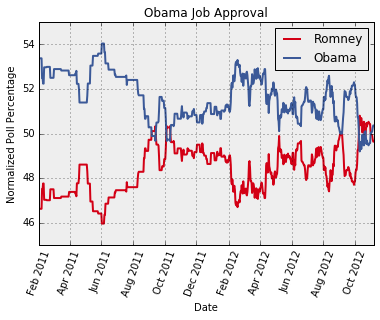

In [13]:
poll_plot(1171)
plt.title("Obama Job Approval")

In [14]:
governor_race_source=urllib2.urlopen("https://www.realclearpolitics.com/epolls/2010/governor/2010_elections_governor_map.html").read()
governor_race_html=BeautifulSoup(governor_race_source)

/usr/local/lib/python2.7/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /usr/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [15]:
import fnmatch
import os
def find_governor_races(html):
    governor_races=[]
    governor_race_html=BeautifulSoup(html)
    list_of_allinks=governor_race_html.find_all('option')

    pattern_with_http="http://www.realclearpolitics.com/epolls/*/governor/*/*.html"
    for line in list_of_allinks:
        link=line.get("value")
        link=str(link)
        if fnmatch.fnmatch(link,pattern_with_http):
            governor_link=link
            governor_races.append(governor_link)
    return governor_races 

In [16]:
source=urllib2.urlopen('http://www.realclearpolitics.com/epolls/2010/governor/2010_elections_governor_map.html').read()
find_governor_races(source)

['http://www.realclearpolitics.com/epolls/2010/governor/al/alabama_governor_bentley_vs_sparks-1586.html',
 'http://www.realclearpolitics.com/epolls/2010/governor/ak/alaska_governor_parnell_vs_berkowitz-1510.html',
 'http://www.realclearpolitics.com/epolls/2010/governor/az/arizona_governor_brewer_vs_goddard-1409.html',
 'http://www.realclearpolitics.com/epolls/2010/governor/ar/arkansas_governor_keet_vs_beebe-1568.html',
 'http://www.realclearpolitics.com/epolls/2010/governor/ca/california_governor_whitman_vs_brown-1113.html',
 'http://www.realclearpolitics.com/epolls/2010/governor/co/colorado_governor_maes_vs_hickenlooper_vs_tancredo-1677.html',
 'http://www.realclearpolitics.com/epolls/2010/governor/ct/connecticut_governor_foley_vs_malloy-1357.html',
 'http://www.realclearpolitics.com/epolls/2010/governor/fl/florida_governor_scott_vs_sink_vs_chiles-1607.html',
 'http://www.realclearpolitics.com/epolls/2010/governor/ga/georgia_governor_deal_vs_barnes-1316.html',
 'http://www.realclearpo

In [17]:
def race_result(url):
    browser=webdriver.Firefox() 
    browser.get(url)
    urlsearch=url
    contestant_one_name=browser.find_element_by_xpath('/html/body/div/div[3]/div[3]/table/tbody/tr[1]/th[4]').text
    contestant_one_name=contestant_one_name[0:contestant_one_name.index('(')-1]
    contestant_one_percentage=browser.find_element_by_xpath('/html/body/div/div[3]/div[3]/table/tbody/tr[2]/td[4]').text
    contestant_two_name=browser.find_element_by_xpath('/html/body/div/div[3]/div[3]/table/tbody/tr[1]/th[5]').text
    contestant_two_name=contestant_two_name[0:contestant_two_name.index('(')-1]
    contestant_two_percentage=browser.find_element_by_xpath('/html/body/div/div[3]/div[3]/table/tbody/tr[2]/td[5]').text
    versusno=str(browser.find_element_by_xpath('//*[@id="main-poll-title"]').text)
    totalvs=(versusno).count('vs.')
    if totalvs==2:
        contestant_three_name=browser.find_element_by_xpath('/html/body/div/div[3]/div[3]/table/tbody/tr[1]/th[6]').text
        contestant_three_percentage=browser.find_element_by_xpath('/html/body/div/div[3]/div[3]/table/tbody/tr[2]/td[6]').text
        contestant_three_percentage=100-(float(contestant_two_percentage)+float(contestant_one_percentage))
        try:
            contestant_three_name=contestant_three_name[0:contestant_three_name.index('(')-1]
        except:
            contestant_three_name=contestant_three_name
        result={str(contestant_one_name):float(contestant_one_percentage),str(contestant_two_name):float(contestant_two_percentage),str(contestant_three_name):float(contestant_three_percentage)}
        browser.close()
        return result
        
    elif totalvs==1:
        contestant_one_percentage=100-float(contestant_two_percentage)
        result={str(contestant_one_name):float(contestant_one_percentage),str(contestant_two_name):float(contestant_two_percentage)}
        browser.close()
        return result
    
    #print str(contestant_one_name)+contestant_one_percentage

In [18]:
race_result('http://www.realclearpolitics.com/epolls/2010/governor/fl/florida_governor_scott_vs_sink_vs_chiles-1607.html')

{'Scott': 52.3, 'Sink': 47.7}

In [19]:
def id_from_url(url):
    """Given a URL, look up the RCP identifier number"""
    return url.split('-')[-1].split('.html')[0]


def plot_race(url):
    """Make a plot summarizing a senate race
    
    Overplots the actual race results as dashed horizontal lines
    """
    #hey, thanks again for these functions!
    id = id_from_url(url)
    xml = get_poll_xml(id)    
    colors = plot_colors(xml)

    if len(colors) == 0:
        return
    
    #really, you shouldn't have
    result = race_result(url)
    
    poll_plot(id)
    plt.xlabel("Date")
    plt.ylabel("Polling Percentage")
    for r in result:
        plt.axhline(result[r], color=colors[_strip(r)], alpha=0.6, ls='--')

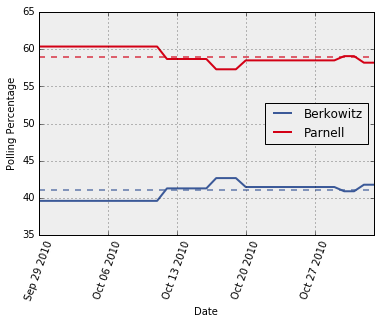

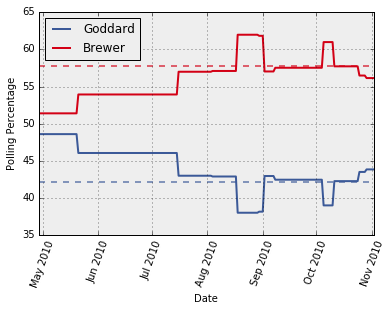

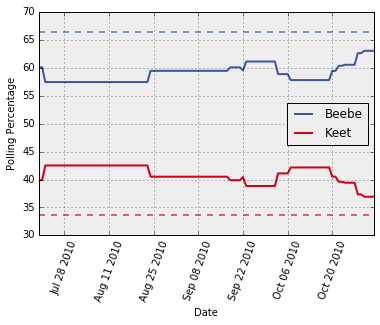

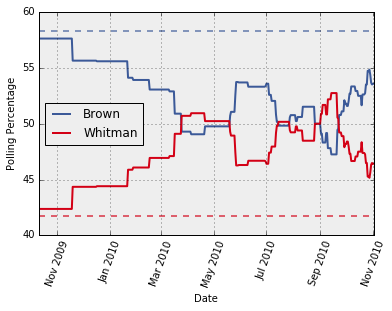

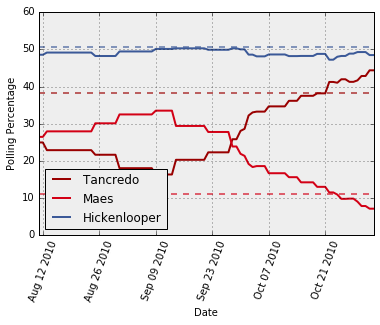

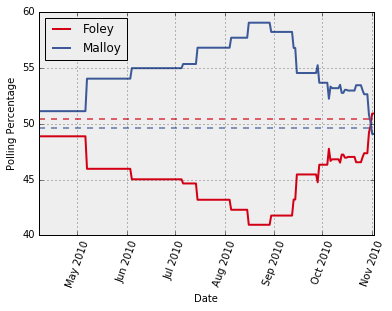

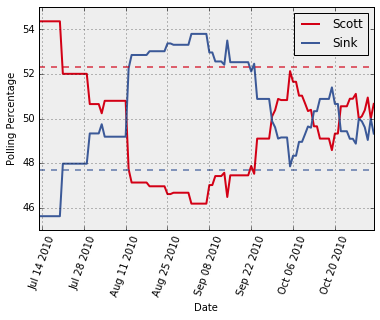

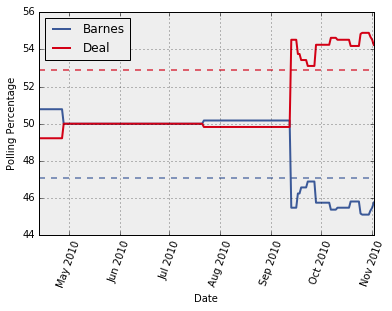

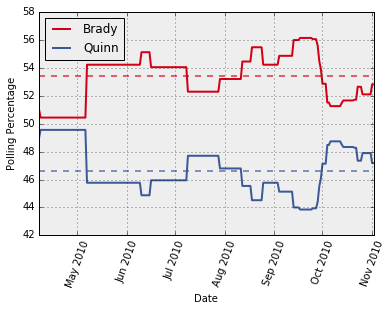

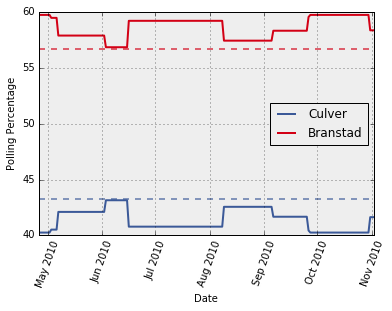

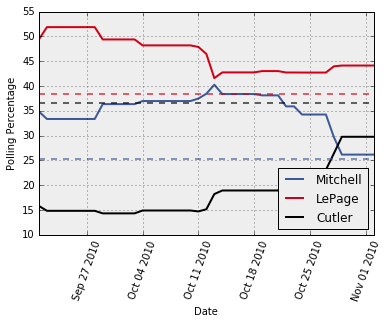

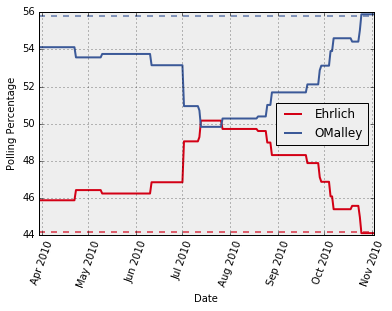

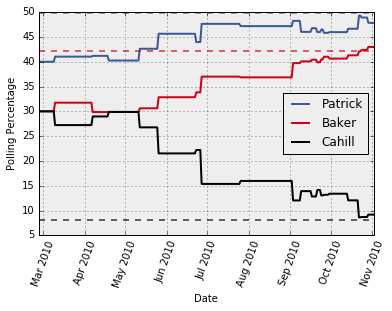

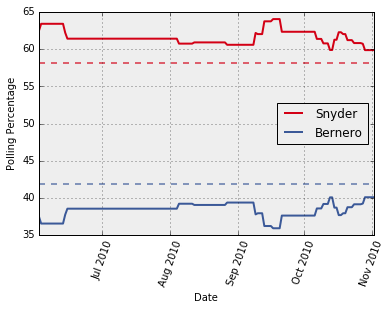

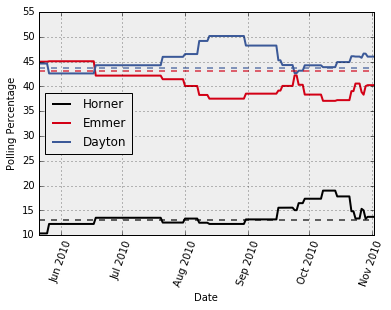

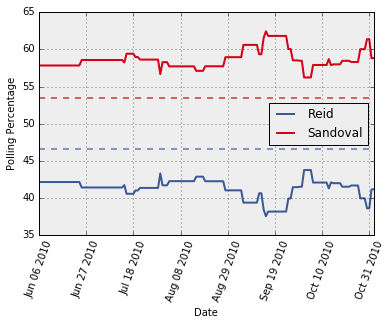

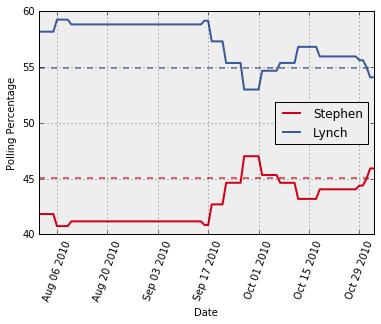

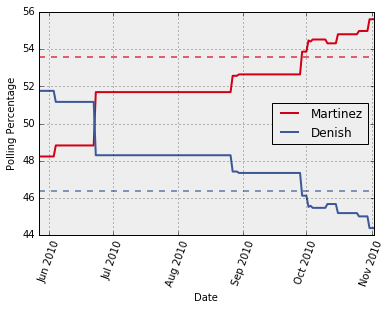

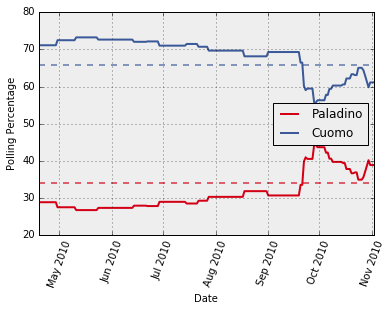

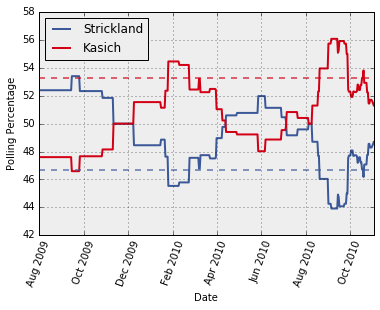

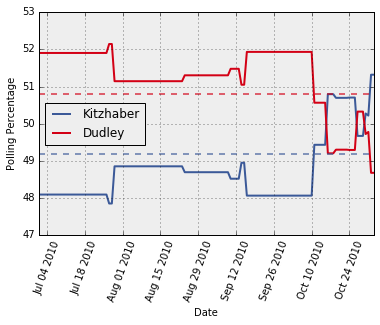

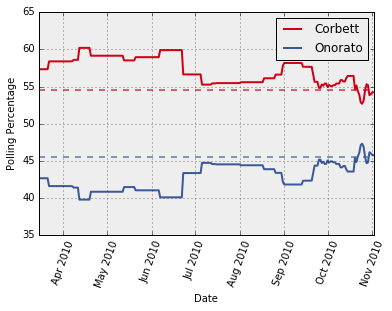

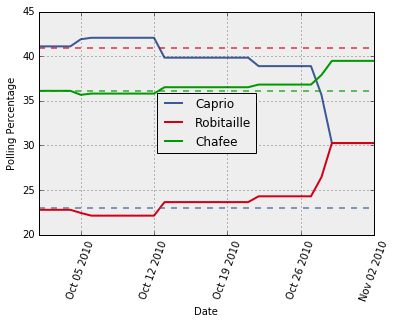

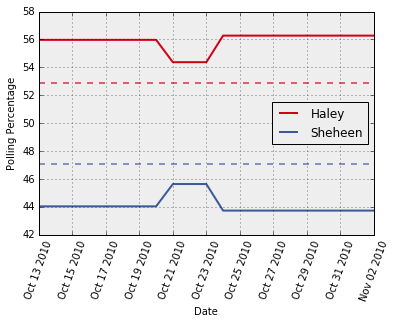

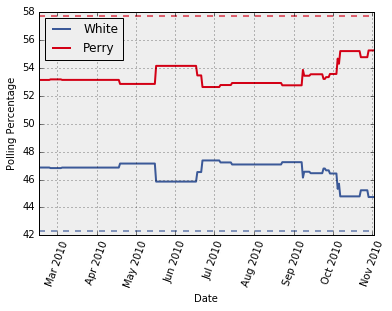

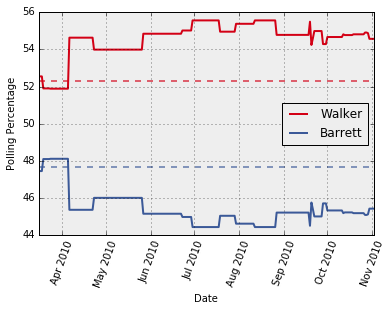

In [234]:
page = requests.get('http://www.realclearpolitics.com/epolls/2010/governor/2010_elections_governor_map.html').text.encode('ascii', 'ignore')

for race in find_governor_races(page):
    plot_race(race)
    plt.show()

In [23]:

def party_from_color(color):
    if color in ['#0000CC', '#3B5998']:
        return 'democrat'
    if color in ['#FF0000', '#D30015']:
        return 'republican'
    return 'other'


def error_data(url):
    """
    Given a Governor race URL, download the poll data and race result,
    and construct a DataFrame with the following columns:
    
    candidate: Name of the candidate
    forecast_length: Number of days before the election
    percentage: The percent of poll votes a candidate has.
                Normalized to that the canddidate percentages add to 100%
    error: Difference between percentage and actual race reulst
    party: Political party of the candidate
    
    The data are resampled as necessary, to provide one data point per day
    """
    
    id = id_from_url(url)
    xml = get_poll_xml(id)
    
    colors = plot_colors(xml)
    if len(colors) == 0:
        return pd.DataFrame()
    
    df = rcp_poll_data(xml)
    result = race_result(url)
    
    #remove non-letter characters from columns
    df = df.rename(columns={c: _strip(c) for c in df.columns})
    for k, v in result.items():
        result[_strip(k)] = v 
    
    candidates = [c for c in df.columns if c is not 'date']
        
    #turn into a timeseries...
    df.index = df.date
    
    #...so that we can resample at regular, daily intervals
    df = df.resample('D')
    df = df.dropna()
    
    #compute forecast length in days
    #(assuming that last forecast happens on the day of the election, for simplicity)
    forecast_length = (df.index.max() - df.index).values
    forecast_length = forecast_length / np.timedelta64(1, 'D')  # convert to number of days
    
    #compute forecast error
    errors = {}
    normalized = {}
    poll_lead = {}
    
    for c in candidates:
        #turn raw percentage into percentage of poll votes
        corr = df[c].values / df[candidates].sum(axis=1).values * 100.
        err = corr - result[_strip(c)]
        
        normalized[c] = corr
        errors[c] = err
        
    n = forecast_length.size
    
    result = {}
    result['percentage'] = np.hstack(normalized[c] for c in candidates)
    result['error'] = np.hstack(errors[c] for c in candidates)
    result['candidate'] = np.hstack(np.repeat(c, n) for c in candidates)
    result['party'] = np.hstack(np.repeat(party_from_color(colors[_strip(c)]), n) for c in candidates)
    result['forecast_length'] = np.hstack(forecast_length for _ in candidates)
    
    result = pd.DataFrame(result)
    return result

In [59]:
def all_error_data():
    resultframe=pd.DataFrame()
    for race in find_governor_races(page):
        dataframe=error_data(race)
        resultframe=resultframe.append(dataframe,ignore_index=True)
    return resultframe

In [67]:
df=all_error_data()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: FutureWarning: 
.resample() is now a deferred operation
You called dropna(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in divide


In [70]:
df['error'].std()


5.448454215143405

In [98]:
df.describe()

,error,forecast_length,percentage
count,9.628000e+03,10027.000000,9628.000000
mean,6.494367e-17,115.850204,47.008725
std,5.448454e+00,91.129619,10.380760
min,-2.219620e+01,0.000000,7.172131
25%,-3.276337e+00,44.000000,42.907801
50%,-2.768519e-01,98.000000,48.453608
75%,3.175610e+00,164.000000,53.179191
max,2.242403e+01,465.000000,73.214286


In [88]:
import numpy as np
np.nan

nan

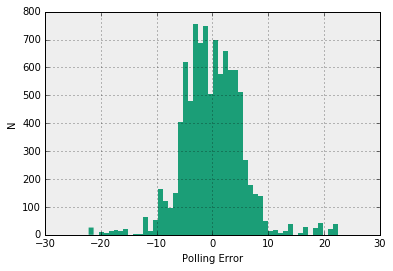

In [99]:
df.error.hist(bins=50)
plt.xlabel("Polling Error")
plt.ylabel('N')

In [139]:
a=df[df.forecast_length > 30]
a

,candidate,error,forecast_length,party,percentage
0,Berkowitz,-1.471179,41.0,democrat,39.628821
1,Berkowitz,-1.471179,40.0,democrat,39.628821
2,Berkowitz,-1.471179,39.0,democrat,39.628821
3,Berkowitz,-1.471179,38.0,democrat,39.628821
4,Berkowitz,-1.471179,37.0,democrat,39.628821
5,Berkowitz,-1.471179,36.0,democrat,39.628821
6,Berkowitz,-1.471179,35.0,democrat,39.628821
7,Berkowitz,-1.471179,34.0,democrat,39.628821
8,Berkowitz,-1.471179,33.0,democrat,39.628821
9,Berkowitz,-1.471179,32.0,democrat,39.628821


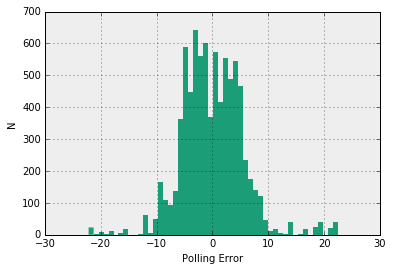

In [114]:
a.error.hist(bins=50)
plt.xlabel("Polling Error")
plt.ylabel('N')

In [115]:
b=df[df.forecast_length < 7]

In [116]:
b['error'].std()

nan

In [130]:
errors=df['error'].fillna(0)

In [131]:
df['error']=errors

In [132]:
df

,candidate,error,forecast_length,party,percentage
0,Berkowitz,-1.471179,41.0,democrat,39.628821
1,Berkowitz,-1.471179,40.0,democrat,39.628821
2,Berkowitz,-1.471179,39.0,democrat,39.628821
3,Berkowitz,-1.471179,38.0,democrat,39.628821
4,Berkowitz,-1.471179,37.0,democrat,39.628821
5,Berkowitz,-1.471179,36.0,democrat,39.628821
6,Berkowitz,-1.471179,35.0,democrat,39.628821
7,Berkowitz,-1.471179,34.0,democrat,39.628821
8,Berkowitz,-1.471179,33.0,democrat,39.628821
9,Berkowitz,-1.471179,32.0,democrat,39.628821


In [133]:
b=df[df.forecast_length <7]

In [138]:
b['error'].std()

0.0

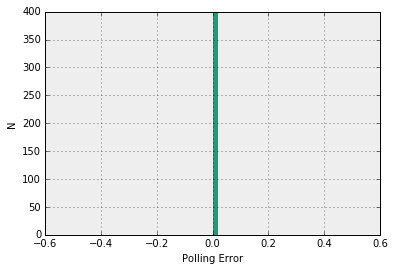

In [141]:
b.error.hist(bins=50)
plt.xlabel("Polling Error")
plt.ylabel('N')

In [143]:
df[df.forecast_length < 7]

,candidate,error,forecast_length,party,percentage
35,Berkowitz,0.0,6.0,democrat,NaN
36,Berkowitz,0.0,5.0,democrat,NaN
37,Berkowitz,0.0,4.0,democrat,NaN
38,Berkowitz,0.0,3.0,democrat,NaN
39,Berkowitz,0.0,2.0,democrat,NaN
40,Berkowitz,0.0,1.0,democrat,NaN
41,Berkowitz,0.0,0.0,democrat,NaN
77,Parnell,0.0,6.0,republican,NaN
78,Parnell,0.0,5.0,republican,NaN
79,Parnell,0.0,4.0,republican,NaN


In [144]:
b['error'][35]

0.0

In [191]:
bootstrdataframe=error_data('https://www.realclearpolitics.com/epolls/2013/governor/nj/new_jersey_governor_christie_vs_buono-3411.html')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: FutureWarning: 
.resample() is now a deferred operation
You called dropna(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in divide


In [193]:
bootstrdataframe
errorbootstrap=bootstrdataframe['error'].fillna(0)

In [197]:
bootstrdataframe['error']=errorbootstrap
bootstrdataframe

,candidate,error,forecast_length,party,percentage
0,Buono,-14.389916,286.0,democrat,25.210084
1,Buono,-14.389916,285.0,democrat,25.210084
2,Buono,-14.389916,284.0,democrat,25.210084
3,Buono,-14.389916,283.0,democrat,25.210084
4,Buono,-14.389916,282.0,democrat,25.210084
5,Buono,-14.389916,281.0,democrat,25.210084
6,Buono,-14.389916,280.0,democrat,25.210084
7,Buono,-14.389916,279.0,democrat,25.210084
8,Buono,-14.389916,278.0,democrat,25.210084
9,Buono,-14.389916,277.0,democrat,25.210084


In [228]:

buno=bootstrdataframe[bootstrdataframe['candidate']=="Buono"]


In [229]:
import random
bunop=[]
christie=[]
for i in range(len(range(1000))):
    randomnumbercuc=random.choice(buno['error'])
    randomnumberau=-randomnumbercuc
    bunop.append(randomnumbercuc)
    christie.append(randomnumberau)
    

In [216]:
buno['percentage']=percentages

TypeError: list indices must be integers, not str

In [215]:
buno

[]

In [219]:
import random
buno=[]
christie=[]
for i in range(len(range(1000))):
    randomnumbercuc=random.choice(buno['error'])
    randomnumberau=-randomnumbercuc
    buno.append(randomnumbercuc)
    christie.append(randomnumberau)
    

TypeError: list indices must be integers, not str

In [233]:

bunop[0:2]
christie[0:2]

[8.009090909090908, 8.2046511627907]

In [230]:
sum(bunop)/1000

-8.29598478518179

In [231]:
sum(christie)/1000

8.29598478518179

In [180]:
mcau[0:2]

[0.11083123425692065, 2.0]

In [181]:
race_result('https://www.realclearpolitics.com/epolls/2013/governor/va/virginia_governor_cuccinelli_vs_mcauliffe-3033.html')

{'Cuccinelli': 52.0, 'McAuliffe': 48.0}